# ImageDataGenerator and Data Augmentation



Data augmentation occurs when we create new data based on modifications of our existing data. Essentially, we’re creating new, augmented data by making reasonable modifications to data in our training set. 

For example, we could augment image data by flipping the images, either horizontally or vertically. We could rotate the images, zoom in or out, crop, or even vary the color of the images. All of these are common data augmentation techniques. 


- Horizontal flip
- Vertical flip
- Rotation
- Zoom in
- Zoom out
- Cropping
- Color variations


## Why use data augmentation?

#### 1. Adding more datas:
We may just want or need to add more data to our training set. For example, say we have a relatively small amount of samples to include in our training set, and it’s difficult to get more. Then we could create new data from our existing data set using data augmentation to create more samples

#### 2. Reducing overfitting:
If our model is overfitting, one technique to reduce it to add more data to the training set. 

#### 3. Better classifying:
We had a data set full of images of dogs, but most of the dogs were facing to the right.
If a model was trained on these images, it’s reasonable to think that the model would believe that only these right-facing dogs were actually dogs. It may very well not classify left-facing dogs as actually being dogs when we deploy this model in the field or use it to predict on test images

<img src="dog.jpeg">


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage

import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

%matplotlib inline

Using TensorFlow backend.


In [2]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [4]:
image_path='cat_and_dogs/1.jpg'

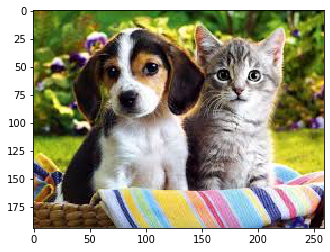

In [5]:
image=load_img(image_path)
plt.imshow(image)

In [6]:
x = img_to_array(image)
x = x.reshape((1,) + x.shape)

Generate batches of augmented images from image.

In [7]:
aug_iter=datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='cat', save_format='jpeg')

In [8]:
aug_images=[next(aug_iter)[0] for i in range(20)]

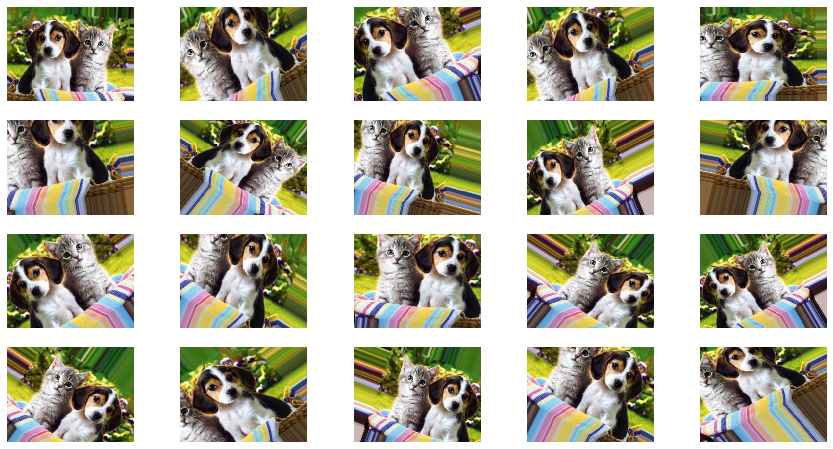

In [9]:
plots(aug_images, figsize=(15,8), rows=4)